### Amazon Comments Scratchwork 

In [3]:
import json
import pandas as pd

import os
os.chdir("/home/spenser/Downloads/")



file = pd.read_csv('/home/spenser/Downloads/amazon_reviews_us_Books_v1_02.tsv',  error_bad_lines=False, sep='\t')

b'Skipping line 1680001: expected 15 fields, saw 22\n'


In [ ]:
len(file)

In [ ]:
file.columns

In [ ]:

file["review_body"] = file["review_body"].str.lower()

In [ ]:
file["review_body"] = file["review_body"].str.replace(r'\nRevision: (\d+)\n', '') #remove digits

In [ ]:
file_no_null = file.dropna(subset=['review_body'], how='all')

In [ ]:
len(file_no_null )

In [ ]:
import random

random.seed(42)

sample = file_no_null.sample(n=300000,replace=False)

In [ ]:
sample

In [ ]:
sample_index = sample['review_body'].index


In [ ]:
import gc
file = []
gc.collect()

In [12]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

sample["review_body"] = sample['review_body'].apply(remove_punctuations)  #remove punctuation

#Adding this due to finding below that pre-cleansed text is corrupt. (contains cases like can t) 

In [13]:

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')



# Remove stop words.
sample['review_body']  = sample['review_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) #stop word removal.

In [14]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /home/spenser/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
import nltk
# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nouns_verbs = [] #empty to array to hold all nouns
#sentences = ["The striped bats are hanging on their feet for best", "This that", 'the queen']
for doc in sample['review_body']:
     for word,pos in nltk.pos_tag(nltk.word_tokenize(str(doc))):
         if (pos == 'NN' or pos == 'NNP' or pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBZ' or pos == 'NNS' or pos == 'NNPS'):
             nouns_verbs.append(word)

In [ ]:
nouns_verbs_set = set(nouns_verbs)

In [ ]:
reviews_nouns_pd.index = sample.index

In [ ]:
reviews_nouns_pd_na = reviews_nouns_pd.dropna(subset=['review_body_nouns'])

In [ ]:
top_words = pd.Series(' '.join(reviews_nouns_pd_na["review_body_nouns"]).lower().split()).value_counts()[:200]

In [ ]:
top_words_list = top_words.index

In [ ]:
top_words = top_words_list.values

In [ ]:
top_words_pd = pd.DataFrame(top_words)

In [15]:
top_words = pd.Series(' '.join(sample['review_body'] ).lower().split()).value_counts()[:200]

In [16]:
print(pd.DataFrame(top_words).to_string())

                  0
book         596070
br           207484
read         188705
one          178757
like         111172
would        100667
story         97094
books         91131
good          88254
many          81640
great         80509
time          80170
also          78286
life          76934
well          76236
first         75161
much          71629
reading       70481
even          66923
people        66599
really        63892
get           63324
way           60096
new           56032
author        54760
characters    54585
love          53711
could         52004
know          51961
work          50498
find          50195
us            49708
think         49680
world         49032
make          48244
dont          48100
found         46105
best          45816
years         44453
written       44286
novel         42957
little        42252
two           42232
never         40815
see           40078
want          38501
reader        36350
better        35967
still         35416


In [17]:
#top_words = pd.DataFrame(top_words)

#s#ample['review_body_nv'] = sample['review_body'].apply(lambda x: [word for word in x.split() if ( (word not in (top_words)) and word in (nouns_verbs_set))]) #stop word removal.
sample['review_body'] = sample['review_body'].apply(lambda x: [word for word in x.split() if ( (word not in (top_words)))]) #stop word removal.

#personal


In [19]:
sample['review_body']

145710     [baby, hearts, mother, month, allowed, glimps,...
2156158    [players, fast, paced, held, interest, polo, p...
3052126    [program, week, energy, diet, sun, giving, hop...
1205158    [collection, collections, thom, jones, came, g...
2149311    [met, mary, beth, catholic, youth, confrence, ...
2544688    [24, hours, ha, heres, sequel, quotteach, writ...
2150042    [rate, five, stars, excellence, treatment, sub...
2036850    [months, remains, source, remind, struggling, ...
1661234    [big, step, tedious, number, places, culprit, ...
2356840    [nantucket, trilogy, deal, totally, unnecessar...
1047804    [picked, library, impression, supposed, funny,...
978740     [bought, built, working, goetia, temple, follo...
1021945    [live, middle, east, happen, kamal, salibi, st...
1791666    [workbook, youve, already, earlier, whats, wor...
1092966    [late, terence, mckenna, goddess, bless, consi...
2815525    [caught, eye, nonfiction, interest, developmen...
1464811    [creates, com

In [17]:
from nltk import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stem_documents(sentence):
    #tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in sentence]
    return ' '.join(stemmed_tokens)

sample['review_body']  = sample['review_body'].apply(stem_documents) # Apply stemming


#PARENT

In [18]:
sample

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
409054,US,51683015,RV1XX5E9MVBFB,1586217097,294324369,Night Fall (John Corey),Books,4.0,0.0,0.0,N,N,End blows you away,slow overal keep involv scott brick power move,2004-12-29
253603,US,13639038,RFB8S08CN1GKK,0451191145,604964480,Atlas Shrugged,Books,5.0,9.0,15.0,N,N,"Long, but doubtless enjoyable",atlas shrug intellectu novel extrem compel bri...,2005-05-04
2076894,US,44899405,R1GPKZITBQIENQ,006440725X,834947098,How I Survived Being a Girl (Harper Trophy),Books,5.0,0.0,0.0,N,N,&quot;How I Survived Being A Girl&quot;,girl want fit brother guy babi sister born bec...,2001-03-08
377608,US,36642996,R2X44P7U5YRWZB,1400063043,772777117,A Redbird Christmas: A Novel,Books,5.0,4.0,4.0,N,N,A Warm and Tasty Read,fanni flagg serv holiday cheer charm inhabit s...,2005-01-22
471137,US,52809057,RANQ6Y0TEV49L,074326455X,209760164,Prince of Thieves: A Novel,Books,4.0,3.0,6.0,N,N,Will remind you of Mystic River and Good Will ...,princ thiev set charlestown massachusett suppo...,2004-10-31
864688,US,22665353,R12DIE96ANLBSK,0385494785,82772270,Into Thin Air: A Personal Account of the Mt. E...,Books,4.0,0.0,0.0,N,N,Very Well Written,krakauer amaz describ event lead disast everes...,2003-12-15
64875,US,50270209,R3UPCTUVZ5V10U,1579546013,979439662,Body for Life for Women: A Woman's Plan for Ph...,Books,5.0,10.0,11.0,N,N,You won't believe it!,complet 12 week program astound result 53 danc...,2005-09-09
2274436,US,47929396,R14WMDKI6MVTE,0764304364,349109374,The Illustrated Buyer's Guide to Oriental Carpets,Books,5.0,10.0,10.0,N,N,Essential reference book,user friend orient carpet inform appreci orien...,2000-09-22
1013832,US,29400284,R3HWP7ZHB3IF8I,0970445911,686378894,Mathemagical Showtime! Investigating the Math ...,Books,5.0,0.0,3.0,N,N,Yes Math Can Be Exciting !,provid activ excit brstudent interest provid s...,2003-08-12
163092,US,16735679,R3AZU1HGKS8JTF,0895260166,363643550,Porn Generation: How Social Liberalism Is Corr...,Books,1.0,21.0,51.0,N,N,Do people make stupid choices? Yes. Should w...,near age seen agre societi take turn wors agre...,2005-07-17


In [30]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [20]:
def doc_to_words(documents):
    for doc in documents:

        yield(gensim.utils.simple_preprocess(str(doc), deacc=False))  # deacc=True removes punctuations

data_words = list(doc_to_words( sample['review_body']))

In [21]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100) # higher threshold fewer phrases.


bigram_mod = gensim.models.phrases.Phraser(bigram)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])



In [22]:
                                                                 # Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]                                                                                                 

In [99]:
from gensim import models

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
        
    for num_topics in range(start, limit, step):
        
        #Using LdaMulticore on 12 CPUs to distribute this LDA search. Speed is the obvious advantage of using this
        #method , but there are some disadvantaged ... e.g., no alpha = auto to learn from the data. 
        #ideally we wouldn't have a super-complex model with 100+ topics, but, it's possible that 
        #the more complex model might make the 
        
        model = models.LdaMulticore(corpus, id2word=id2word, num_topics=num_topics, workers=11)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [100]:
import gc
gc.collect()


103

In [25]:
###RUN LDA TOPIC MODEL #2 

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=10, limit=80, step=6)

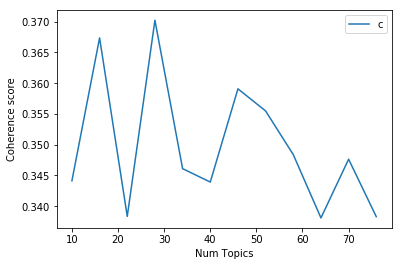

In [27]:
# Show graph

# peak around 6 topics, but overall there's not much movement in coherence
# coherence range (0, 31) So, differences in these topic values might
# be extremely subtle / not informative.

limit=80; start=10; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


####
between 12-17

#25-30

#12-18

#### Support for increase number of topics 

In [28]:
coherence_values

[0.34413132627281223,
 0.3673796075847214,
 0.3383364828012309,
 0.3702475094153609,
 0.3461025205136211,
 0.34392159903044217,
 0.3590930463646506,
 0.35548881645306857,
 0.34838671384554126,
 0.33808900705763695,
 0.34763845471114435,
 0.33828801279097687]

In [29]:
model_list[3]

In [31]:
###RUN LDA TOPIC MODEL #2 

model_list_b, coherence_values_b = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=25, limit=30, step=1)

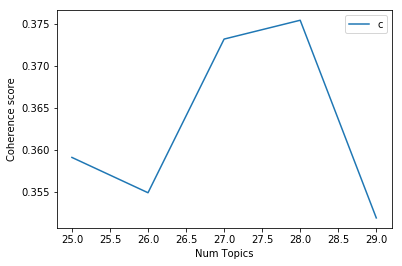

In [32]:
# Show graph

# peak around 6 topics, but overall there's not much movement in coherence
# coherence range (0, 31) So, differences in these topic values might
# be extremely subtle / not informative.

limit=30; start=25; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_b)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


#### Support for increase number of topics 

In [34]:
coherence_values_b

[0.3591164898619203,
 0.3549094347220655,
 0.37321525106628284,
 0.3754598457260509,
 0.35190951283421756]

In [ ]:
data_words

In [ ]:
coherence_values_b

In [ ]:
###RUN LDA TOPIC MODEL #2 

model_list2, coherence_values2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=50, limit=80, step=1)

In [ ]:
# Show graph

# peak around 6 topics, but overall there's not much movement in coherence
# coherence range (0, 31) So, differences in these topic values might
# be extremely subtle / not informative.

limit=25; start=23; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


#### Support for increase number of topics 

In [ ]:
###RUN LDA TOPIC MODEL #2 

model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=26, limit=23, step=1)

In [43]:
coherence_values_b

[0.3591164898619203,
 0.3549094347220655,
 0.37321525106628284,
 0.3754598457260509,
 0.35190951283421756]

In [44]:
# Select the model and print the topics
print('LDA 17 TOPICS')
optimal_model = model_list_b[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=100))


### Topic 21 politics culture business, management economics, government 

LDA 17 TOPICS
[(14,
  '0.010*"game" + 0.006*"play" + 0.004*"illustr" + 0.003*"pictur" + '
  '0.003*"beauti" + 0.003*"color" + 0.003*"card" + 0.003*"tri" + 0.002*"list" '
  '+ 0.002*"kid" + 0.002*"use" + 0.002*"art" + 0.002*"simpl" + 0.002*"want" + '
  '0.002*"start" + 0.002*"anim" + 0.002*"includ" + 0.002*"big" + 0.002*"love" '
  '+ 0.002*"pattern" + 0.002*"perfect" + 0.002*"gift" + 0.002*"guid" + '
  '0.002*"provid" + 0.002*"hair" + 0.002*"design" + 0.002*"detail" + '
  '0.002*"cover" + 0.002*"show" + 0.002*"review" + 0.002*"bought" + '
  '0.002*"clear" + 0.002*"live" + 0.002*"player" + 0.002*"kind" + '
  '0.002*"small" + 0.002*"exampl" + 0.002*"tell" + 0.002*"like" + 0.002*"help" '
  '+ 0.002*"idea" + 0.001*"follow" + 0.001*"basic" + 0.001*"copi" + '
  '0.001*"spell" + 0.001*"refer" + 0.001*"describ" + 0.001*"mean" + '
  '0.001*"chang" + 0.001*"write" + 0.001*"recip" + 0.001*"descript" + '
  '0.001*"present" + 0.001*"favorit" + 0.001*"hope" + 0.001*"bring" + '
  '0.001*"techniqu" + 0

In [ ]:
topic_keywords = ", ".join([word for word, prop in wp])

In [ ]:
# Consider a seeded approach 

In [ ]:
topic_keywords = ", ".join([word for word, prop in wp])

In [ ]:
sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

In [ ]:
prop_topic = 3
topic_num = 1
sent_topics_df = pd.DataFrame()
sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

In [ ]:
data_words.index

In [ ]:
df_topic_sents_keywords

In [ ]:
sample[sample.index == 482007]["review_body"][482007]

In [ ]:
df_topic_sents_keywords[df_topic_sents_keywords.index ==482007]["Topic_Keywords"][482007]

In [ ]:
df_topic_sents_keywords[df_topic_sents_keywords["Dominant_Topic"] == 1]

In [ ]:
 wp = ldamodel.show_topic(optimal_model)

In [47]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_words_bigrams)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(200)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4650,"review, bird, beauti, certain, come, live, sta...","[slow, overal, keep, involv, scott, brick, pow..."
1,1,8.0,0.9776,"review, idea, writer, class, mean, tri, write,...","[atlas_shrug, intellectu, novel, extrem, compe..."
2,2,13.0,0.5581,"fan, tale, father, novel, turn, mother, vampir...","[girl, want, fit, brother, guy, babi, sister, ..."
3,3,3.0,0.3279,"mother, get, tell, problem, death, tri, happen...","[fanni_flagg, serv, holiday, cheer, charm, inh..."
4,4,16.0,0.3731,"edit, start, publish, review, write, comic, fa...","[princ, thiev, set, charlestown, massachusett,..."
5,5,25.0,0.9716,"guid, help, detail, cover, includ, tell, map, ...","[krakauer, amaz, describ, event, lead, disast,..."
6,6,11.0,0.8275,"recip, food, cook, eat, cookbook, diet, tri, i...","[complet, week, program, astound, result, danc..."
7,7,20.0,0.4358,"use, exampl, refer, cover, practic, student, p...","[user, friend, orient, carpet, inform, appreci..."
8,8,7.0,0.4898,"show, start, scene, tri, seem, turn, like, rev...","[provid, activ, excit, brstudent, interest, pr..."
9,9,3.0,0.6948,"mother, get, tell, problem, death, tri, happen...","[near, age, seen, agre, societi, take, turn, w..."


In [51]:
df_dominant_topic.to_csv('df_dominant_topic.csv')

In [4]:
import pandas as pd
df_dominant_topic = pd.read_csv("df_dominant_topic.csv")

In [5]:
len(df_dominant_topic[df_dominant_topic["Dominant_Topic"] == 21])

22231

In [ ]:
df_dominant_topic[df_dominant_topic["Dominant_Topic"] == 1]["Keywords"][2278788]

In [6]:
import numpy as np
df_dominant_topic["business_ind"] = np.where(df_dominant_topic.Dominant_Topic ==21, 1, 0)

In [53]:
df_dominant_topic.index = sample.index

In [56]:
df_dominant_topic["index"] = sample.index

In [57]:
sample["index"] = sample.index

In [58]:
merged_dat = sample.merge(df_dominant_topic, left_index=True, right_on='index')

In [7]:
business = df_dominant_topic[df_dominant_topic["Dominant_Topic"] == 21]

In [8]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
detokenizer = TreebankWordDetokenizer()





# Remove stop words.
business['DeText']  = detokenizer.detokenize(business['Text'])  #remove punctuation


/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

business["DeText"] = business['Text'].apply(remove_punctuations)  #remove punctuation

#Adding this due to finding below that pre-cleansed text is corrupt. (contains cases like can t) 

/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
from gensim import models

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
        
    for num_topics in range(start, limit, step):
        
        #Using LdaMulticore on 12 CPUs to distribute this LDA search. Speed is the obvious advantage of using this
        #method , but there are some disadvantaged ... e.g., no alpha = auto to learn from the data. 
        #ideally we wouldn't have a super-complex model with 100+ topics, but, it's possible that 
        #the more complex model might make the 
        
        model = models.LdaMulticore(corpus, id2word=id2wordb, num_topics=num_topics, workers=11)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:
def doc_to_words(documents):
    for doc in documents:

        yield(gensim.utils.simple_preprocess(str(doc), deacc=False))  # deacc=True removes punctuations

data_wordsb = list(doc_to_words( business['DeText']))



def make_bigrams(texts):
    return [bigram_modb[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_modb[doc]] for doc in texts]

bigramb = gensim.models.Phrases(data_wordsb, min_count=10, threshold=100) # higher threshold fewer phrases.


bigram_modb = gensim.models.phrases.Phraser(bigramb)

# Form Bigrams
data_words_bigramsb = make_bigrams(data_wordsb)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

                                                                 # Create Dictionary
id2wordb = corpora.Dictionary(data_words_bigramsb)

# Create Corpus
textsb = data_words_bigramsb

# Term Document Frequency
corpusb = [id2wordb.doc2bow(text) for text in textsb]   

In [41]:
###RUN LDA TOPIC MODEL #2 

model_listb, coherence_valuesb = compute_coherence_values(dictionary=id2wordb, corpus=corpusb, texts=data_words_bigramsb, start=2, limit=20, step=1)

In [ ]:
merged_dat[merged_dat["business_ind"] == 1]["review_body"][88732]

In [ ]:
sample[sample["index"]== 88732]

In [ ]:
df_dominant_topic[df_dominant_topic.index == 88732]["Keywords"]

In [ ]:
df_dominant_topic[df_dominant_topic.index == 88732]

In [ ]:
merged_dat[merged_dat["business_ind"] == 1]["Keywords"][88732]

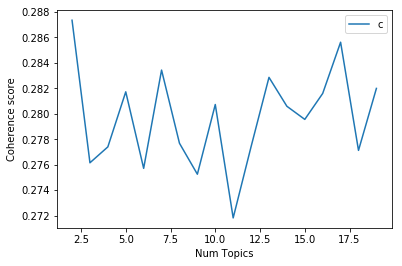

In [42]:
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_valuesb)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [44]:
coherence_valuesb

[0.28735641953167146,
 0.27614884714838456,
 0.27739909816055863,
 0.2817277393374722,
 0.27571097380537957,
 0.2834377577254664,
 0.27768486748196,
 0.2752494397888696,
 0.28073005903275866,
 0.27181340587531366,
 0.27741559672411753,
 0.2828649693582283,
 0.28059209366748133,
 0.2795600485143792,
 0.28160010188025697,
 0.2856282994371189,
 0.27712412142522863,
 0.2819961813511942]

In [45]:
# Select the model and print the topics
print('LDA 17 TOPICS')
optimal_model = model_listb[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=100))


### Topic 21 politics culture business, management economics, government 

LDA 17 TOPICS
[(0,
  '0.004*"polit" + 0.003*"cultur" + 0.003*"power" + 0.003*"chang" + '
  '0.003*"state" + 0.003*"system" + 0.003*"busi" + 0.003*"show" + '
  '0.002*"provid" + 0.002*"present" + 0.002*"america" + 0.002*"societi" + '
  '0.002*"issu" + 0.002*"idea" + 0.002*"manag" + 0.002*"countri" + '
  '0.002*"problem" + 0.002*"exampl" + 0.002*"econom" + 0.002*"develop" + '
  '0.002*"start" + 0.002*"studi" + 0.002*"clear" + 0.002*"explain" + '
  '0.002*"compani" + 0.002*"review" + 0.002*"public" + 0.002*"success" + '
  '0.002*"use" + 0.002*"valu" + 0.002*"today" + 0.002*"law" + 0.002*"critic" + '
  '0.002*"includ" + 0.002*"live" + 0.002*"creat" + 0.002*"govern" + '
  '0.002*"mean" + 0.002*"nation" + 0.002*"view" + 0.002*"practic" + '
  '0.002*"understand" + 0.001*"social" + 0.001*"question" + 0.001*"tri" + '
  '0.001*"product" + 0.001*"futur" + 0.001*"dr" + 0.001*"case" + 0.001*"relat" '
  '+ 0.001*"support" + 0.001*"moral" + 0.001*"interest" + 0.001*"concept" + '
  '0.001*"respons" + 

In [32]:
###RUN LDA TOPIC MODEL #2 

model_listb2, coherence_valuesb2 = compute_coherence_values(dictionary=id2wordb, corpus=corpusb, texts=data_words_bigramsb, start=21, limit=35, step=2)

Process ForkPoolWorker-53:
Process ForkPoolWorker-47:
Process ForkPoolWorker-52:
Process ForkPoolWorker-46:
Process ForkPoolWorker-45:
Process ForkPoolWorker-54:
Process ForkPoolWorker-55:
Process ForkPoolWorker-49:
Process ForkPoolWorker-48:
Process ForkPoolWorker-51:
Process ForkPoolWorker-50:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self

KeyboardInterrupt: 

  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/gensim/models/ldamulticore.py", line 286, in worker_e_step
    chunk_no, chunk, worker_lda = input_queue.get()
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/pool.py", line 105, in worker
    initializer(*initargs)
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/gensim/models/ldamulticore.py", line 286, in worker_e_step
    chunk_no, chunk, worker_lda = input_queue.get()
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/spenser/.conda/envs/gpu/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    retur

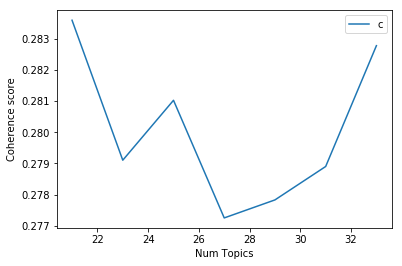

In [110]:
limit=35; start=21; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_valuesb2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
###RUN LDA TOPIC MODEL #2 

model_listb2, coherence_valuesb2 = compute_coherence_values(dictionary=id2wordb, corpus=corpusb, texts=data_words_bigramsb, start=21, limit=35, step=2)

In [33]:
###RUN LDA TOPIC MODEL #2 

model_listb3, coherence_valuesb3 = compute_coherence_values(dictionary=id2wordb, corpus=corpusb, texts=data_words_bigramsb, start=36, limit=45, step=2)

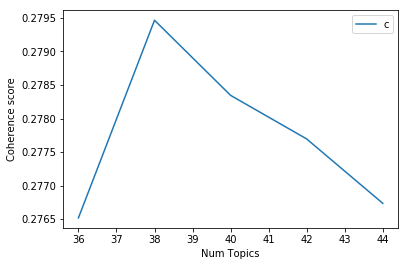

In [36]:
limit=45; start=36; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_valuesb3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [84]:
import gc
gc.collect()

2979

In [10]:
#TFIDF (Term Frequency Inverse Document Frequency will provide relative importance weightings for terms, and
# de-emphasize more common terms ... this should help with the problems noted above.)
import gc
gc.collect()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#without going through and manually picking out stop-words  like time, ask, etc, as stop words that seem to be driving the
#above categories 

#tfidf_vectorizer = TfidfVectorizer()
#tfidf = tfidf_vectorizer.fit_transform(bank_service_train["sparse"])

#tfidf_array = tfidf.toarray()
#df = tfidf_array
#Use silhouette score                                               
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(min_df=5)
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

business_tfidf, tfidf_vectorizer = tfidf(business["DeText"])
tfidf_array = business_tfidf.toarray()

In [11]:
business_tfidf.shape

(22231, 17645)

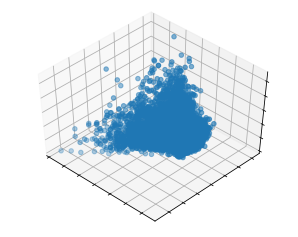

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


fig = plt.figure(figsize=(5.5, 3))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=48, azim=134)
X = tfidf_array
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()



In [13]:
#### RESET MEMORY

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import gc
gc.collect()
#####
range_n_clusters = list (range(3,7))
print ("Number of clusters from 2 to 7: \n", range_n_clusters)

range_n_clusters = list (range(2,7))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters, n_jobs=11)
    preds = clusterer.fit_predict(tfidf_array)
    centers = clusterer.cluster_centers_

    score = silhouette_score (tfidf_array, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
#appear to be 3 clusters based on this     
###Confirming visual interpretation, we have two distinct clusters 

Number of clusters from 2 to 7: 
 [3, 4, 5, 6]


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9), SIGKILL(-9), SIGKILL(-9), SIGKILL(-9), SIGKILL(-9), SIGKILL(-9)}